In [3]:
import numpy as np
import pandas as pd
import joblib
import sys

sys.path.append("..")
from helpers import filename_for

Welcome to JupyROOT 6.16/00


In [4]:
from sklearn.ensemble import RandomForestClassifier


def train(x_train, y_train):
    settings = {
        "n_estimators": 60,
        "min_samples_split": 36,
        "min_samples_leaf": 6,
        "n_jobs": -1,
        "random_state": 1337,
    }
    model = RandomForestClassifier(**settings)
    model.fit(x_train, y_train)

    return model

In [5]:
def get_df(n, s):
    file = filename_for(15, 30, 600, 500, n, "inclxx", s, "clusterfeature.pkl")
    df = pd.read_pickle(file)
    df["nPN"] = n
    df["s"] = s
    return df


dfs = [get_df(n, s) for n in [1, 2, 3, 4] for s in range(20)]
data = pd.concat(dfs, ignore_index=True)

print(data["prim"].value_counts())
display(data)

0.0    8670780
1.0    1782525
Name: prim, dtype: int64


,i_event,prim,T,E,Size,EToF,EnergyMoment,TSpawn,MaxEHit,X,Y,Z,nPN,s
0,0.0,0.0,71.581505,63.396915,1.0,590.198181,2.274847e-13,0.000000,63.396915,-52.500000,-18.102734,1697.5,1,0
1,0.0,0.0,73.151093,84.208214,4.0,572.796570,3.417675e+00,0.789268,34.340248,-48.729828,-32.500000,1722.5,1,0
2,0.0,0.0,77.737602,7.413320,1.0,466.224731,2.273737e-13,0.000000,7.413320,-22.500000,-66.481422,1737.5,1,0
3,0.0,0.0,74.923073,54.931568,2.0,556.477112,3.014597e+00,0.361863,28.205269,-39.288017,22.500000,1752.5,1,0
4,0.0,0.0,79.689758,6.995298,1.0,447.399139,0.000000e+00,0.000000,6.995298,-13.274235,32.500000,1762.5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10453300,9999.0,0.0,85.814194,30.276972,1.0,360.921478,2.273741e-13,0.000000,30.276972,-81.505493,-2.500000,1782.5,4,19
10453301,9999.0,1.0,63.421486,1.582491,1.0,621.388550,8.881784e-16,0.000000,1.582491,-18.501257,-7.500000,1522.5,4,19
10453302,9999.0,1.0,64.527313,107.203804,2.0,592.722473,1.786238e+00,0.123449,83.293358,2.122552,12.500000,1532.5,4,19
10453303,9999.0,1.0,68.791878,7.254709,1.0,508.969696,2.274014e-13,0.000000,7.254709,27.792263,-72.500000,1572.5,4,19


In [6]:
prim1 = data[data["prim"] == 1]
prim0 = data[data["prim"] == 0].sample(n=len(prim1.index), random_state=1337)
balanced_data = pd.concat([prim0, prim1], ignore_index=True).sample(frac=1, random_state=1337)

print(balanced_data["prim"].value_counts())

1.0    1782525
0.0    1782525
Name: prim, dtype: int64


In [5]:
features = ["T", "E", "Size", "EToF", "EnergyMoment", "TSpawn", "MaxEHit", "X", "Y", "Z"]
model = train(balanced_data[features], balanced_data["prim"].values.ravel())
joblib.dump(model, "models/15m_30dp_600AMeV_500keV_4n_RandomForestClassifier.pkl")

['models/15m_30dp_600AMeV_500keV_4n_RandomForestClassifier.sav']

In [6]:
data["pred_prim"] = model.predict(data[features])
data["pred_prim_proba"] = model.predict_proba(data[features])[:, 1]
display(data)

,i_event,prim,T,E,Size,EToF,EnergyMoment,TSpawn,MaxEHit,X,Y,Z,nPN,s,pred_prim,pred_prim_proba
0,0.0,0.0,71.581505,63.396915,1.0,590.198181,2.274847e-13,0.000000,63.396915,-52.500000,-18.102734,1697.5,1,0,0.0,0.384779
1,0.0,0.0,73.151093,84.208214,4.0,572.796570,3.417675e+00,0.789268,34.340248,-48.729828,-32.500000,1722.5,1,0,0.0,0.290042
2,0.0,0.0,77.737602,7.413320,1.0,466.224731,2.273737e-13,0.000000,7.413320,-22.500000,-66.481422,1737.5,1,0,0.0,0.003529
3,0.0,0.0,74.923073,54.931568,2.0,556.477112,3.014597e+00,0.361863,28.205269,-39.288017,22.500000,1752.5,1,0,0.0,0.103691
4,0.0,0.0,79.689758,6.995298,1.0,447.399139,0.000000e+00,0.000000,6.995298,-13.274235,32.500000,1762.5,1,0,0.0,0.006611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10453300,9999.0,0.0,85.814194,30.276972,1.0,360.921478,2.273741e-13,0.000000,30.276972,-81.505493,-2.500000,1782.5,4,19,0.0,0.009967
10453301,9999.0,1.0,63.421486,1.582491,1.0,621.388550,8.881784e-16,0.000000,1.582491,-18.501257,-7.500000,1522.5,4,19,1.0,0.966742
10453302,9999.0,1.0,64.527313,107.203804,2.0,592.722473,1.786238e+00,0.123449,83.293358,2.122552,12.500000,1532.5,4,19,1.0,0.963739
10453303,9999.0,1.0,68.791878,7.254709,1.0,508.969696,2.274014e-13,0.000000,7.254709,27.792263,-72.500000,1572.5,4,19,0.0,0.112486


(0.0, 1000000.0)

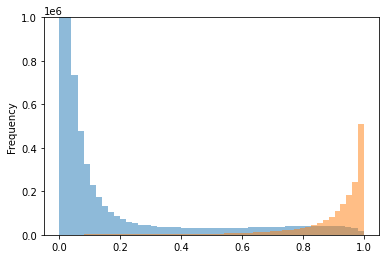

In [7]:
data[data["prim"] == 0.0]["pred_prim_proba"].plot.hist(bins=50, alpha=0.5)
ax = data[data["prim"] == 1.0]["pred_prim_proba"].plot.hist(bins=50, alpha=0.5)
ax.set_ylim(0, 1e6)

In [8]:
mult_per_event = data.groupby(["s", "nPN", "i_event"])[["pred_prim"]].sum().rename(columns={"pred_prim": "nPN_pred"})
mult = mult_per_event.groupby(["nPN", "nPN_pred"]).size().to_frame("size")
display(mult)

size
nPN nPN_pred        
1   0.0        14408
    1.0       122127
    2.0        40465
    3.0        10177
    4.0         2254
    5.0          542
    6.0          120
    7.0           18
    8.0            7
    9.0            2
    11.0           1
2   0.0         1033
    1.0        23441
    2.0        77270
    3.0        59404
    4.0        26387
    5.0         8639
    6.0         2446
    7.0          709
    8.0          155
    9.0           39
    10.0          10
    11.0           2
    12.0           1
    13.0           1
3   0.0           86
    1.0         3690
    2.0        23439
    3.0        54282
    4.0        56216
    5.0        36023
    6.0        16738
    7.0         6496
    8.0         2104
    9.0          657
    10.0         182
    11.0          48
    12.0          13
    13.0           2
    16.0           1
4   0.0            9
    1.0          820
    2.0         6758
    3.0        23503
    4.0        44111
    5.0        48816
    6.0        37378
    7.0        21678
    8.0        10393
    9.0         4306
    10.0        1491
    11.0         521
    12.0         161
    13.0          38
    14.0          12
    15.0           2
    17.0           1
    18.0           1

In [9]:
data.loc[data["pred_prim_proba"] >= 0.8, "pred_prim_08"] = 1.0
data.loc[data["pred_prim_proba"] < 0.8, "pred_prim_08"] = 0.0
display(data)

mult_per_event = (
    data.groupby(["s", "nPN", "i_event"])[["pred_prim_08"]].sum().rename(columns={"pred_prim_08": "nPN_pred"})
)
mult = mult_per_event.groupby(["nPN", "nPN_pred"]).size().to_frame("size")
display(mult)

,i_event,prim,T,E,Size,EToF,EnergyMoment,TSpawn,MaxEHit,X,Y,Z,nPN,s,pred_prim,pred_prim_proba,pred_prim_08
0,0.0,0.0,71.581505,63.396915,1.0,590.198181,2.274847e-13,0.000000,63.396915,-52.500000,-18.102734,1697.5,1,0,0.0,0.384779,0.0
1,0.0,0.0,73.151093,84.208214,4.0,572.796570,3.417675e+00,0.789268,34.340248,-48.729828,-32.500000,1722.5,1,0,0.0,0.290042,0.0
2,0.0,0.0,77.737602,7.413320,1.0,466.224731,2.273737e-13,0.000000,7.413320,-22.500000,-66.481422,1737.5,1,0,0.0,0.003529,0.0
3,0.0,0.0,74.923073,54.931568,2.0,556.477112,3.014597e+00,0.361863,28.205269,-39.288017,22.500000,1752.5,1,0,0.0,0.103691,0.0
4,0.0,0.0,79.689758,6.995298,1.0,447.399139,0.000000e+00,0.000000,6.995298,-13.274235,32.500000,1762.5,1,0,0.0,0.006611,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10453300,9999.0,0.0,85.814194,30.276972,1.0,360.921478,2.273741e-13,0.000000,30.276972,-81.505493,-2.500000,1782.5,4,19,0.0,0.009967,0.0
10453301,9999.0,1.0,63.421486,1.582491,1.0,621.388550,8.881784e-16,0.000000,1.582491,-18.501257,-7.500000,1522.5,4,19,1.0,0.966742,1.0
10453302,9999.0,1.0,64.527313,107.203804,2.0,592.722473,1.786238e+00,0.123449,83.293358,2.122552,12.500000,1532.5,4,19,1.0,0.963739,1.0
10453303,9999.0,1.0,68.791878,7.254709,1.0,508.969696,2.274014e-13,0.000000,7.254709,27.792263,-72.500000,1572.5,4,19,0.0,0.112486,0.0


size
nPN nPN_pred        
1   0.0        53704
    1.0       115270
    2.0        18414
    3.0         2404
    4.0          300
    5.0           27
    6.0            2
2   0.0         7227
    1.0        58820
    2.0        93845
    3.0        32131
    4.0         6431
    5.0          942
    6.0          124
    7.0           16
    8.0            1
3   0.0          873
    1.0        15723
    2.0        58908
    3.0        75680
    4.0        36074
    5.0        10224
    6.0         2099
    7.0          338
    8.0           51
    9.0            7
4   0.0          103
    1.0         4446
    2.0        25381
    3.0        58410
    4.0        62055
    5.0        34042
    6.0        11730
    7.0         3032
    8.0          664
    9.0          118
    10.0          17
    12.0           1

## Ada

In [7]:
from sklearn.ensemble import AdaBoostClassifier

features = ["T", "E", "Size", "EToF", "EnergyMoment", "TSpawn", "MaxEHit", "X", "Y", "Z"]
ada_model = AdaBoostClassifier()
ada_model.fit(balanced_data[features], balanced_data["prim"].values.ravel())
joblib.dump(ada_model, "models/15m_30dp_600AMeV_500keV_4n_AdaBoostClassifier.pkl")

['models/15m_30dp_600AMeV_500keV_4n_AdaBoostClassifier.pkl']

In [8]:
data["pred_prim"] = ada_model.predict(data[features])
data["pred_prim_proba"] = ada_model.predict_proba(data[features])[:, 1]
display(data)

,i_event,prim,T,E,Size,EToF,EnergyMoment,TSpawn,MaxEHit,X,Y,Z,nPN,s,pred_prim,pred_prim_proba
0,0.0,0.0,71.581505,63.396915,1.0,590.198181,2.274847e-13,0.000000,63.396915,-52.500000,-18.102734,1697.5,1,0,1.0,0.503509
1,0.0,0.0,73.151093,84.208214,4.0,572.796570,3.417675e+00,0.789268,34.340248,-48.729828,-32.500000,1722.5,1,0,0.0,0.495413
2,0.0,0.0,77.737602,7.413320,1.0,466.224731,2.273737e-13,0.000000,7.413320,-22.500000,-66.481422,1737.5,1,0,0.0,0.475828
3,0.0,0.0,74.923073,54.931568,2.0,556.477112,3.014597e+00,0.361863,28.205269,-39.288017,22.500000,1752.5,1,0,0.0,0.486642
4,0.0,0.0,79.689758,6.995298,1.0,447.399139,0.000000e+00,0.000000,6.995298,-13.274235,32.500000,1762.5,1,0,0.0,0.476531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10453300,9999.0,0.0,85.814194,30.276972,1.0,360.921478,2.273741e-13,0.000000,30.276972,-81.505493,-2.500000,1782.5,4,19,0.0,0.479372
10453301,9999.0,1.0,63.421486,1.582491,1.0,621.388550,8.881784e-16,0.000000,1.582491,-18.501257,-7.500000,1522.5,4,19,1.0,0.514691
10453302,9999.0,1.0,64.527313,107.203804,2.0,592.722473,1.786238e+00,0.123449,83.293358,2.122552,12.500000,1532.5,4,19,1.0,0.514426
10453303,9999.0,1.0,68.791878,7.254709,1.0,508.969696,2.274014e-13,0.000000,7.254709,27.792263,-72.500000,1572.5,4,19,0.0,0.482668


(0.0, 1000000.0)

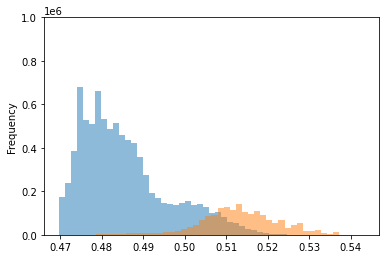

In [9]:
data[data["prim"] == 0.0]["pred_prim_proba"].plot.hist(bins=50, alpha=0.5)
ax = data[data["prim"] == 1.0]["pred_prim_proba"].plot.hist(bins=50, alpha=0.5)
ax.set_ylim(0, 1e6)